In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
print('Done')

Done


In [2]:
data = pd.read_csv("TrainingData_V1.csv")
data

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,22-06-2016,27-06-2016,643,38,navy,30,49.9,30822,Mrs,17-04-1969,1013,23-06-2016,0
1,10,22-06-2016,27-06-2016,195,xxl,grey,46,19.9,30823,Mrs,22-04-1970,1001,15-03-2015,1
2,11,22-06-2016,05-07-2016,25,xxl,grey,5,79.9,30823,Mrs,22-04-1970,1001,15-03-2015,0
3,32,23-06-2016,26-06-2016,173,m,brown,20,19.9,17234,Mrs,09-01-1960,1013,17-02-2015,0
4,43,23-06-2016,26-06-2016,394,40,black,44,90.0,30827,Mrs,NaN,1006,09-02-2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79940,99942,11-09-2016,12-09-2016,39,41,blue,26,89.9,48232,Mrs,24-10-1941,1007,12-09-2016,1
79941,99954,11-09-2016,NaN,1498,42,green,6,59.9,48234,Mrs,02-10-1962,1007,12-09-2016,0
79942,99980,11-09-2016,12-09-2016,1806,unsized,brown,110,16.9,48240,Mr,22-07-1971,1010,17-02-2015,0
79943,99987,11-09-2016,12-09-2016,1530,l,black,56,79.9,12130,Mrs,NaN,1008,20-01-2016,0


In [3]:
data.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,22-06-2016,27-06-2016,643,38,navy,30,49.9,30822,Mrs,17-04-1969,1013,23-06-2016,0
1,10,22-06-2016,27-06-2016,195,xxl,grey,46,19.9,30823,Mrs,22-04-1970,1001,15-03-2015,1
2,11,22-06-2016,05-07-2016,25,xxl,grey,5,79.9,30823,Mrs,22-04-1970,1001,15-03-2015,0
3,32,23-06-2016,26-06-2016,173,m,brown,20,19.9,17234,Mrs,09-01-1960,1013,17-02-2015,0
4,43,23-06-2016,26-06-2016,394,40,black,44,90.0,30827,Mrs,NaN,1006,09-02-2016,1


In [4]:
data.head().T

,0,1,2,3,4
order_item_id,1,10,11,32,43
order_date,22-06-2016,22-06-2016,22-06-2016,23-06-2016,23-06-2016
delivery_date,27-06-2016,27-06-2016,05-07-2016,26-06-2016,26-06-2016
item_id,643,195,25,173,394
item_size,38,xxl,xxl,m,40
item_color,navy,grey,grey,brown,black
brand_id,30,46,5,20,44
item_price,49.9,19.9,79.9,19.9,90.0
user_id,30822,30823,30823,17234,30827
user_title,Mrs,Mrs,Mrs,Mrs,Mrs


In [5]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79945 entries, 0 to 79944
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_item_id  79945 non-null  int64  
 1   order_date     79945 non-null  object 
 2   delivery_date  72509 non-null  object 
 3   item_id        79945 non-null  int64  
 4   item_size      79945 non-null  object 
 5   item_color     79945 non-null  object 
 6   brand_id       79945 non-null  int64  
 7   item_price     79945 non-null  float64
 8   user_id        79945 non-null  int64  
 9   user_title     79945 non-null  object 
 10  user_dob       72956 non-null  object 
 11  user_state     79945 non-null  int64  
 12  user_reg_date  79945 non-null  object 
 13  return         79945 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 8.5+ MB


In [6]:
data.tail()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
79940,99942,11-09-2016,12-09-2016,39,41,blue,26,89.9,48232,Mrs,24-10-1941,1007,12-09-2016,1
79941,99954,11-09-2016,NaN,1498,42,green,6,59.9,48234,Mrs,02-10-1962,1007,12-09-2016,0
79942,99980,11-09-2016,12-09-2016,1806,unsized,brown,110,16.9,48240,Mr,22-07-1971,1010,17-02-2015,0
79943,99987,11-09-2016,12-09-2016,1530,l,black,56,79.9,12130,Mrs,NaN,1008,20-01-2016,0
79944,99997,11-09-2016,12-09-2016,156,20,brown,34,29.9,713,Mrs,21-03-1959,1011,17-02-2015,0


In [7]:
data.isnull()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79940,False,False,False,False,False,False,False,False,False,False,False,False,False,False
79941,False,False,True,False,False,False,False,False,False,False,False,False,False,False
79942,False,False,False,False,False,False,False,False,False,False,False,False,False,False
79943,False,False,False,False,False,False,False,False,False,False,True,False,False,False


# Data cleaning

In [213]:
data.isnull().sum()

order_item_id    0
order_date       0
delivery_date    0
item_id          0
item_size        0
item_color       0
brand_id         0
item_price       0
user_id          0
user_state       0
user_reg_date    0
return           0
dtype: int64

In [10]:
data['delivery_date'].value_counts()

delivery_date
03-07-2016    4031
04-07-2016    2306
28-06-2016    2121
18-07-2016    2024
07-08-2016    1969
              ... 
23-01-2017       1
16-01-2017       1
24-01-2017       1
12-12-2016       1
06-12-2016       1
Name: count, Length: 122, dtype: int64

In [11]:
data[['order_date','delivery_date']].value_counts()

order_date  delivery_date
27-06-2016  28-06-2016       1559
29-06-2016  03-07-2016       1361
27-06-2016  29-06-2016       1180
30-06-2016  03-07-2016        915
28-06-2016  02-07-2016        796
                             ... 
11-09-2016  02-11-2016          1
25-08-2016  05-10-2016          1
11-08-2016  30-10-2016          1
            29-10-2016          1
15-07-2016  31-12-1994          1
Name: count, Length: 2889, dtype: int64

In [12]:
data['delivery_date'] = pd.to_datetime(data['delivery_date']).astype('int64')

In [13]:
data['order_date'] = pd.to_datetime(data['order_date']).astype('int64')

In [14]:
data['user_dob']=pd.to_datetime(data['user_dob']).astype('int64')

In [15]:
data.describe()

,order_item_id,order_date,delivery_date,item_id,brand_id,item_price,user_id,user_dob,user_state,return
count,79945.000000,7.994500e+04,7.994500e+04,79945.000000,79945.000000,79945.000000,79945.000000,7.994500e+04,79945.000000,79945.000000
mean,50056.599925,1.469804e+18,4.686613e+17,924.281231,30.100819,65.088521,27185.708500,-9.708879e+17,1007.268485,0.458590
std,28872.601957,2.144310e+15,3.104567e+18,702.577022,28.157290,47.729105,14063.256304,2.576738e+18,4.281872,0.498285
min,1.000000,1.466554e+18,-9.223372e+18,1.000000,1.000000,0.000000,9.000000,-9.223372e+18,1001.000000,0.000000
25%,25133.000000,1.467418e+18,1.467504e+18,214.000000,5.000000,29.900000,14943.000000,-4.089312e+17,1002.000000,0.000000
50%,49985.000000,1.470182e+18,1.470442e+18,812.000000,25.000000,49.900000,31189.000000,-1.876608e+17,1008.000000,0.000000
75%,75118.000000,1.471651e+18,1.471997e+18,1582.000000,44.000000,79.900000,38931.000000,-3.974400e+15,1010.000000,1.000000
max,100000.000000,1.473552e+18,1.485216e+18,2241.000000,138.000000,999.000000,48241.000000,1.310861e+18,1016.000000,1.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79945 entries, 0 to 79944
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_item_id  79945 non-null  int64  
 1   order_date     79945 non-null  int64  
 2   delivery_date  79945 non-null  int64  
 3   item_id        79945 non-null  int64  
 4   item_size      79945 non-null  object 
 5   item_color     79945 non-null  object 
 6   brand_id       79945 non-null  int64  
 7   item_price     79945 non-null  float64
 8   user_id        79945 non-null  int64  
 9   user_title     79945 non-null  object 
 10  user_dob       79945 non-null  int64  
 11  user_state     79945 non-null  int64  
 12  user_reg_date  79945 non-null  object 
 13  return         79945 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 8.5+ MB


In [17]:
data['delivery_date']=data['delivery_date'].fillna(data['delivery_date'].mean())

In [18]:
data['user_dob']=data['user_dob'].fillna(data['user_dob'].mean())

In [19]:
data.isnull().sum()

order_item_id    0
order_date       0
delivery_date    0
item_id          0
item_size        0
item_color       0
brand_id         0
item_price       0
user_id          0
user_title       0
user_dob         0
user_state       0
user_reg_date    0
return           0
dtype: int64

In [20]:
data.drop(columns=['user_title','user_dob'],inplace=True)

In [21]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
79940    False
79941    False
79942    False
79943    False
79944    False
Length: 79945, dtype: bool

In [22]:
data.duplicated().sum()

0

In [23]:
data

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_state,user_reg_date,return
0,1,1466553600000000000,1466985600000000000,643,38,navy,30,49.9,30822,1013,23-06-2016,0
1,10,1466553600000000000,1466985600000000000,195,xxl,grey,46,19.9,30823,1001,15-03-2015,1
2,11,1466553600000000000,1467676800000000000,25,xxl,grey,5,79.9,30823,1001,15-03-2015,0
3,32,1466640000000000000,1466899200000000000,173,m,brown,20,19.9,17234,1013,17-02-2015,0
4,43,1466640000000000000,1466899200000000000,394,40,black,44,90.0,30827,1006,09-02-2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79940,99942,1473552000000000000,1473638400000000000,39,41,blue,26,89.9,48232,1007,12-09-2016,1
79941,99954,1473552000000000000,-9223372036854775808,1498,42,green,6,59.9,48234,1007,12-09-2016,0
79942,99980,1473552000000000000,1473638400000000000,1806,unsized,brown,110,16.9,48240,1010,17-02-2015,0
79943,99987,1473552000000000000,1473638400000000000,1530,l,black,56,79.9,12130,1008,20-01-2016,0


# Exploratory data analysis

In [25]:
data['item_price'].value_counts()

item_price
39.90     7367
49.90     7274
59.90     6770
69.90     5772
29.90     4216
          ... 
15.63        1
102.95       1
65.85        1
3.40         1
184.91       1
Name: count, Length: 247, dtype: int64

In [26]:
data['item_price'].unique()

array([ 49.9 ,  19.9 ,  79.9 ,  90.  ,  59.9 ,  21.9 ,   9.9 ,  69.9 ,
        89.9 ,  39.9 ,  29.9 ,  39.95,  14.9 ,   7.9 ,  24.9 ,  69.95,
        12.9 , 119.9 ,  20.  ,  34.9 ,  11.9 ,  54.95, 129.9 ,  99.9 ,
       109.9 ,  44.95, 105.  ,   0.  ,  13.95,  99.95,  79.95, 125.  ,
       169.9 ,  49.95,  64.9 ,  13.9 , 139.9 ,  44.9 ,  54.9 ,  42.4 ,
        12.4 ,  65.95,  16.9 ,  72.5 ,  84.9 ,   6.9 ,  74.9 ,  34.95,
         4.9 ,  22.4 ,  65.  ,  16.4 , 114.9 ,  17.4 ,  57.95,   5.5 ,
        29.95,  87.9 ,  27.45,  60.  ,   4.95,  59.95,   9.4 ,   4.4 ,
        47.4 ,  32.45,  62.95, 200.  ,  35.  ,  94.9 , 134.9 ,  32.48,
        32.9 ,  13.45,  82.5 , 149.9 ,   7.4 , 124.9 ,   7.45,   5.95,
        27.48,  94.5 ,  42.9 ,  47.9 ,  22.45,  80.  , 104.9 ,  12.45,
        75.  ,  32.95,  42.95,  40.95,  56.95,  22.95, 199.9 ,  45.  ,
       100.  , 129.41,  17.9 ,  50.  ,  25.45, 249.9 ,  15.9 ,   8.9 ,
        70.  ,  24.95,   8.95, 125.9 ,  27.9 , 179.9 ,  26.9 , 189.9 ,
      

In [27]:
data['brand_id'].unique()

array([ 30,  46,   5,  20,  44,  72,   3,   7,  28,  40,   6,  33,  23,
        19,  25,  37,  39,  14,  12,  34,  36,  78,  49,  21,  32,  42,
        18,  17,  11, 104,  10,  43,  15,   1,  24,   2,   4,  57,  31,
        38,  26,  27,  48,  53,  68,  55,  64,  94,  29,  47,  51,   8,
        45,  50,  77,   9,  54,  74,  69,  56,  16,  41,  70,  59,  60,
        35,  84,  61,  63,  22,  58,  66,  13,  80,  62,  75,  90, 105,
        83,  85,  52,  92,  91,  76,  81,  87,  89,  67,  82,  96, 106,
        73, 102, 113, 117, 120, 110, 118,  88, 122,  97, 123, 111, 114,
        71, 127, 116, 125, 128, 119, 108,  95,  99, 132,  86, 112, 126,
        65,  98, 131, 107, 136,  79, 100, 138, 134, 103, 115, 121, 130,
       135, 129, 137, 133], dtype=int64)

In [28]:
data.sort_values(by="item_price",ascending=True)

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_state,user_reg_date,return
71616,16220,1467244800000000000,1469318400000000000,807,unsized,red,60,0.00,11286,1011,21-04-2016,0
66504,64375,1470873600000000000,1473033600000000000,1472,unsized,brown,60,0.00,761,1008,04-07-2016,0
11768,17849,1467158400000000000,-9223372036854775808,157,unsized,purple,32,0.00,33779,1013,12-01-2016,0
33751,37981,1468800000000000000,1470096000000000000,157,unsized,purple,32,0.00,5981,1010,10-04-2016,0
60831,7329,1466985600000000000,1467072000000000000,157,unsized,purple,32,0.00,24099,1004,30-05-2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38191,82287,1472169600000000000,1472428800000000000,1930,xxl,black,35,399.95,45039,1010,27-08-2016,1
67268,72136,1471392000000000000,1471651200000000000,1930,xxl,dark navy,35,399.95,21949,1007,06-08-2015,1
8973,89916,1472774400000000000,-9223372036854775808,1930,xs,dark navy,35,399.95,46403,1001,17-02-2015,0
25543,55805,1470441600000000000,1470614400000000000,1930,xxl,red,35,399.95,34911,1001,17-02-2015,1


In [29]:
data[data['return']==1].sum()

order_item_id                                           1904158516
order_date                                     8544061494399729664
delivery_date                                    23364631495245824
item_id                                                   35279130
item_size        xxl4042lxxl403841xl184440ll4219lxll42lxl7xlxl4...
item_color       greyblackbordeauxwhitemagentastainedwhiteredol...
brand_id                                                   1135029
item_price                                               2658640.9
user_id                                                  997649985
user_state                                                36928528
user_reg_date    15-03-201509-02-201621-01-201621-01-201617-02-...
return                                                       36662
dtype: object

In [30]:
pd.crosstab(data['user_id'],data['return'])

return,0,1
user_id,,
9,1,4
11,1,0
30,1,1
40,1,2
48,1,3
...,...,...
48237,1,7
48238,1,1
48239,1,1


In [31]:
pd.crosstab(data['user_id'],data['return']).sum()

return
0    43283
1    36662
dtype: int64

In [32]:
pd.crosstab(data['item_size'],data['item_color']) 

item_color,?,almond,amethyst,ancient,anthracite,antique pink,apricot,aqua,aquamarine,ash,...,pink,purple,red,silver,stained,striped,terracotta,turquoise,white,yellow
item_size,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10,0,0,0,3,9,0,0,0,2,0,...,2,0,11,0,0,0,0,0,0,1
10+,0,0,0,1,11,0,0,0,5,0,...,0,0,4,0,9,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,4,0,0,0,0,0,...,0,0,12,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unsized,49,0,0,15,93,0,0,0,9,54,...,24,258,334,12,164,0,0,120,69,22
xl,0,0,0,0,216,0,0,0,70,222,...,92,328,742,14,97,26,0,95,511,47
xs,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0


In [33]:
x=data.groupby('item_id').sum()['return'].index
y=data.groupby('item_id').sum()['return']

In [34]:
x

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       2230, 2231, 2232, 2234, 2235, 2236, 2237, 2238, 2240, 2241],
      dtype='int64', name='item_id', length=1902)

In [35]:
y

item_id
1        54
2        46
3        21
4        63
5       111
       ... 
2236      0
2237      0
2238      0
2240      1
2241      1
Name: return, Length: 1902, dtype: int64

<Axes: xlabel='return', ylabel='Count'>

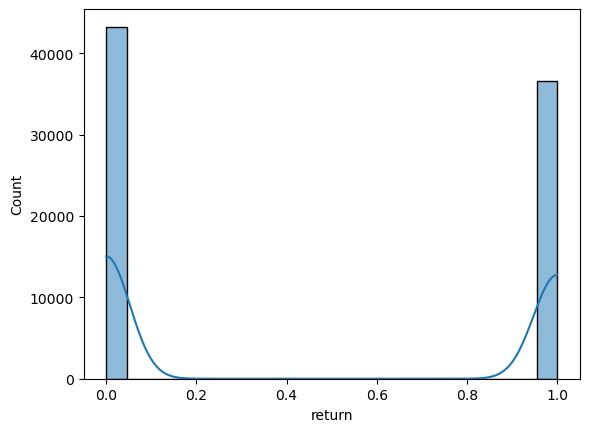

In [36]:
sns.histplot(data['return'],kde=True)

<Axes: xlabel='brand_id', ylabel='Count'>

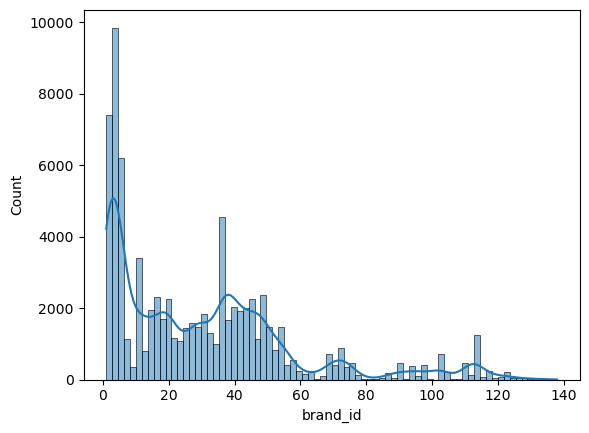

In [37]:
sns.histplot(data['brand_id'],kde=True)

<Axes: xlabel='item_price', ylabel='Count'>

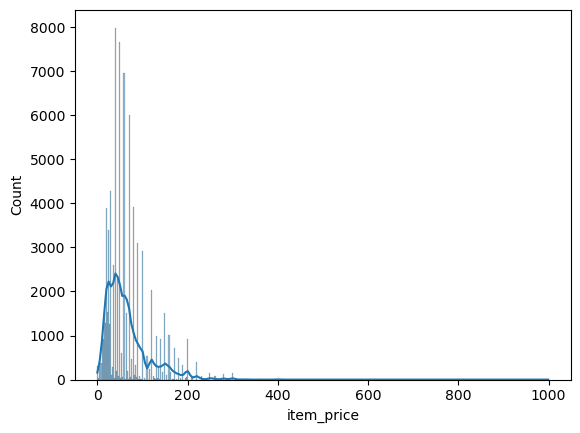

In [38]:
sns.histplot(data['item_price'],kde=True)

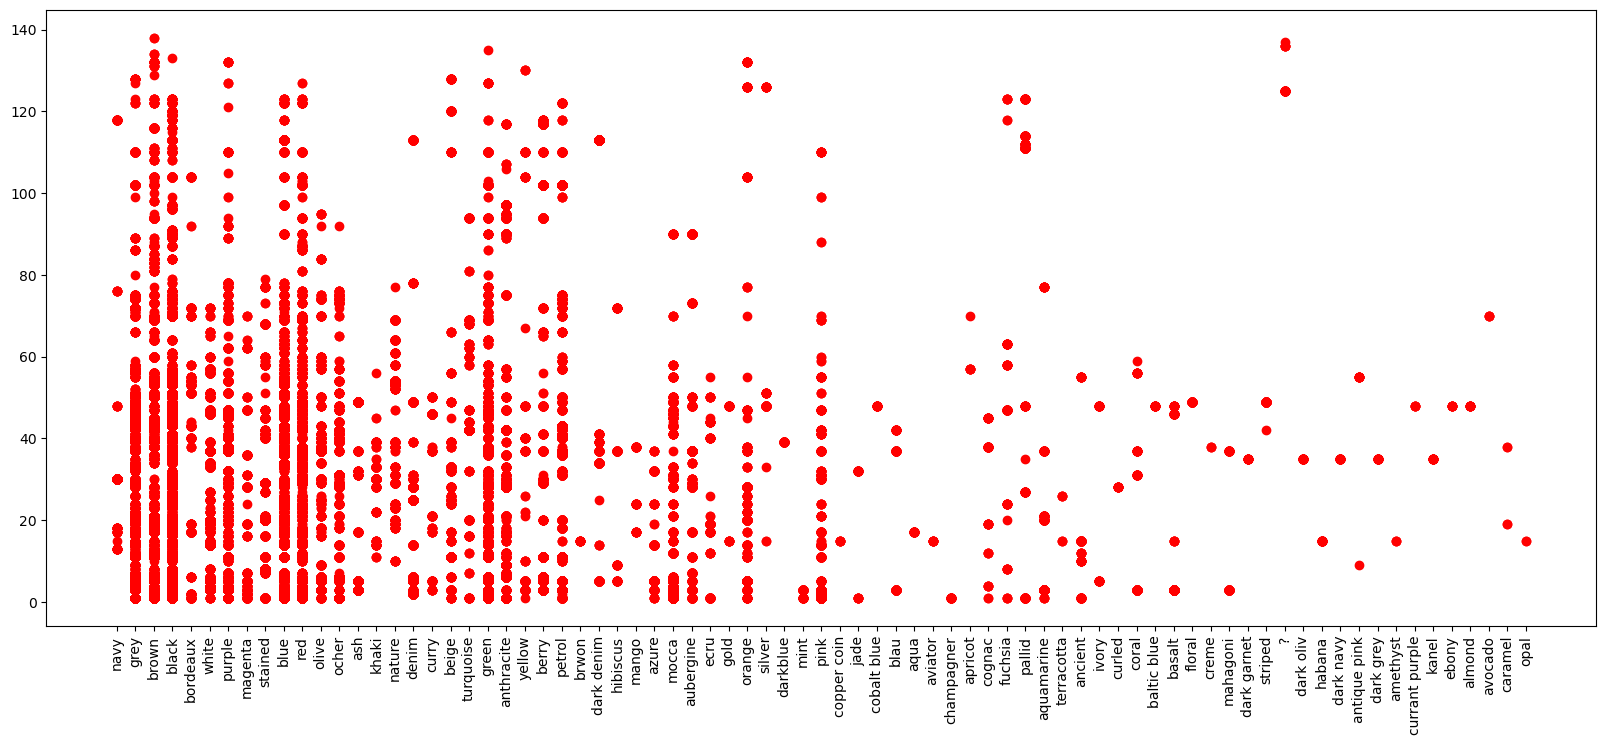

In [39]:
plt.figure(figsize = (20,8))
plt.scatter(x=data['item_color'],y=data['brand_id'],color='red')
plt.xticks(rotation=90,weight=8)
plt.show()

<Axes: xlabel='item_color', ylabel='item_size'>

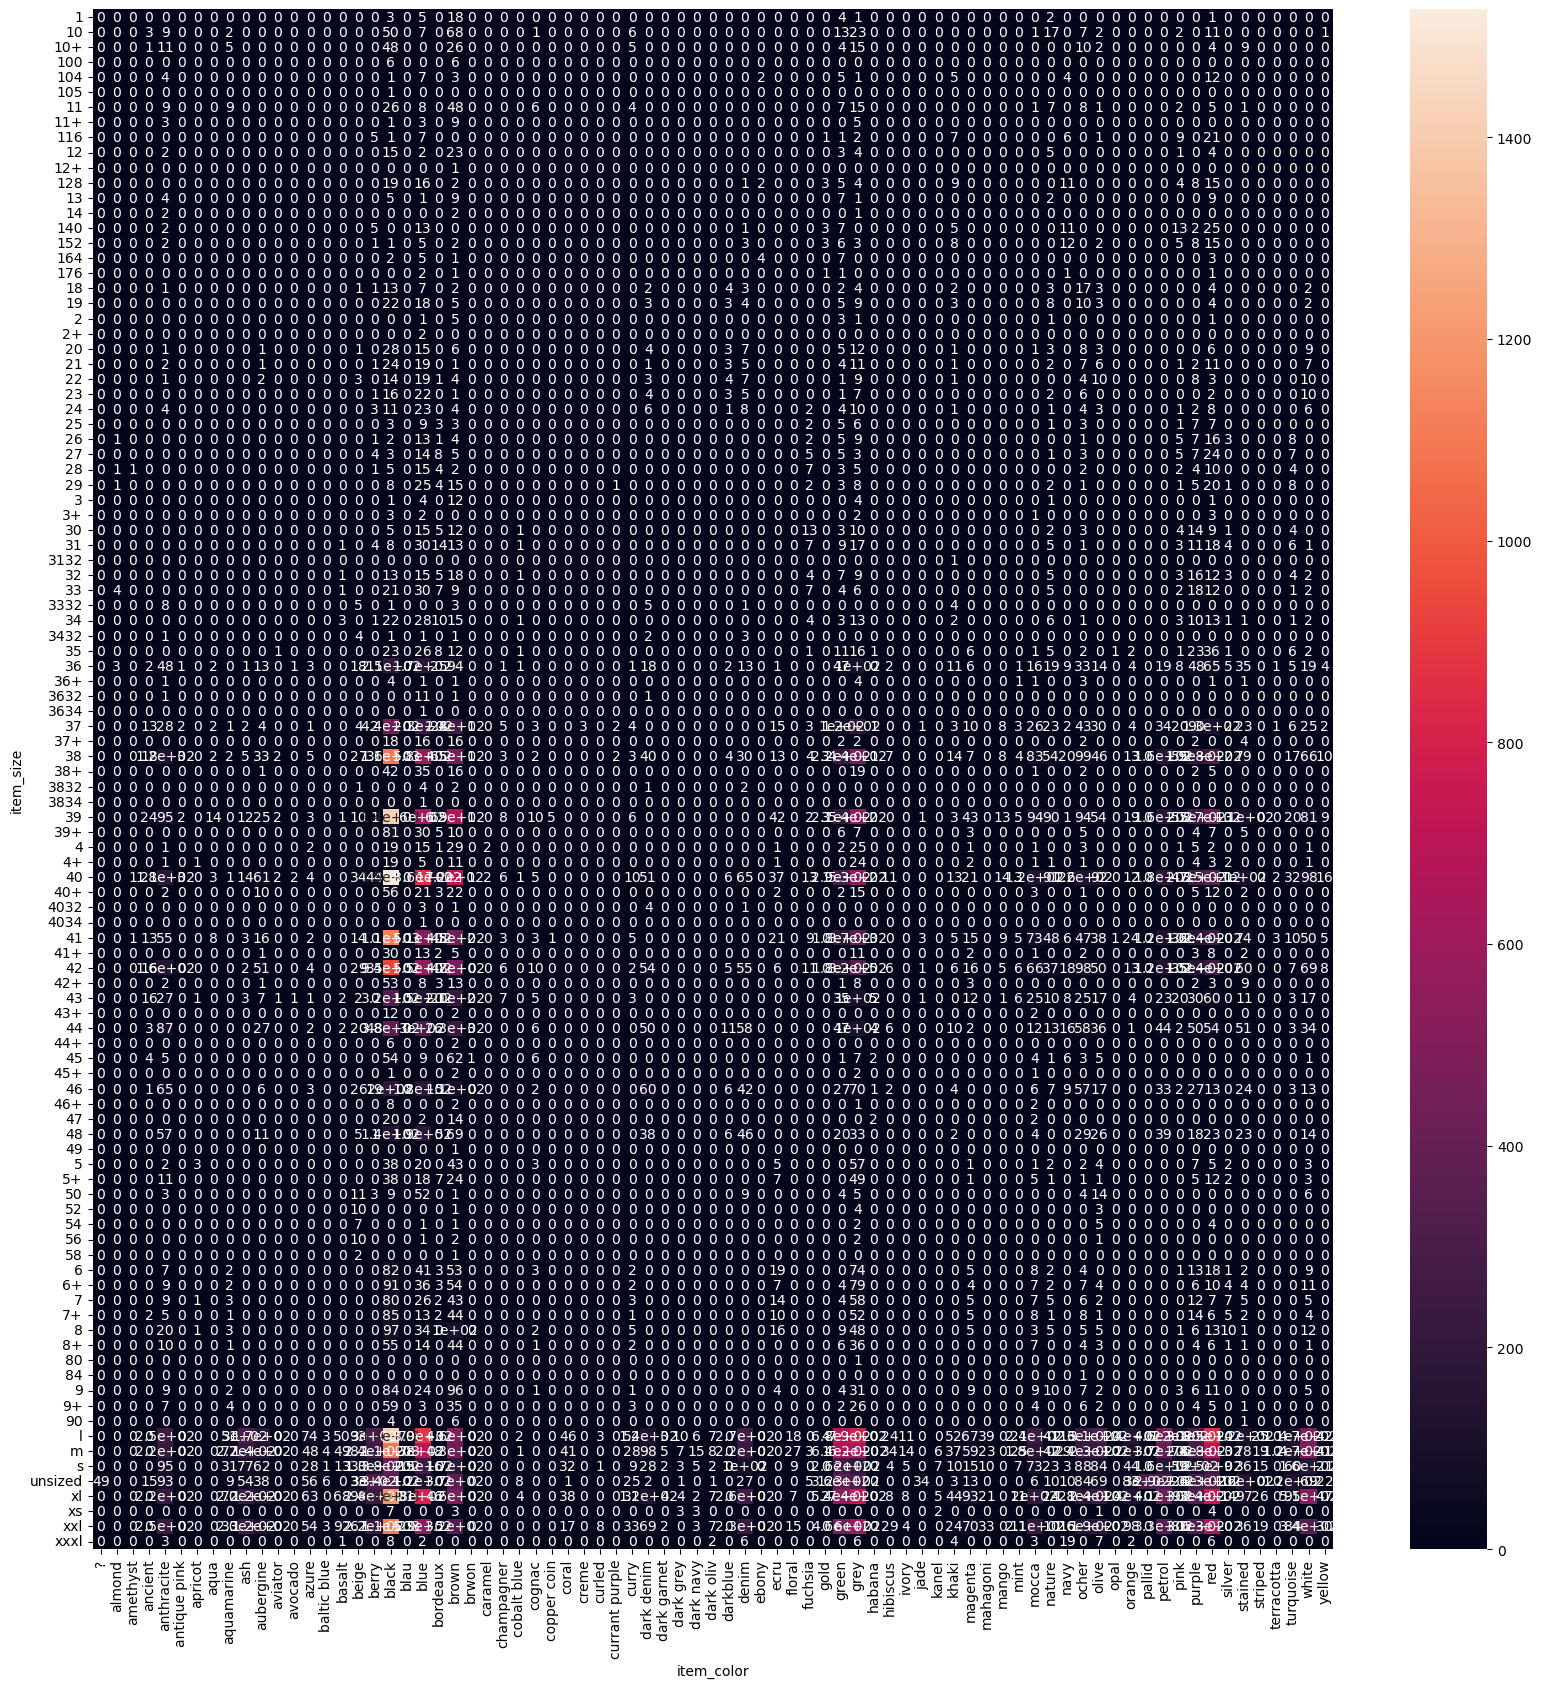

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.crosstab(data['item_size'],data['item_color']),annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x284491aa3f0>,
 'caps': [<matplotlib.lines.Line2D at 0x28453c7f890>,
 'boxes': [<matplotlib.lines.Line2D at 0x2844e3e0920>],
 'medians': [<matplotlib.lines.Line2D at 0x28453c39ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28453c392e0>],
 'means': []}

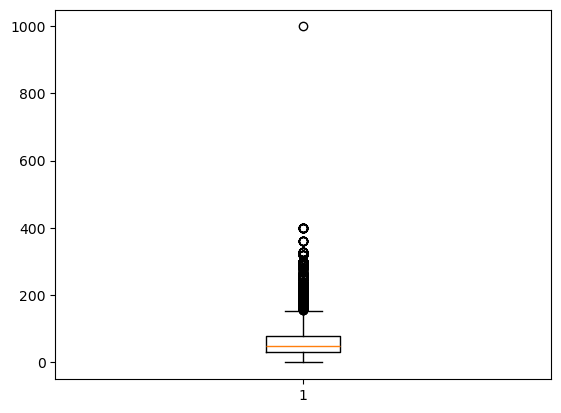

In [41]:
plt.boxplot(data['item_price'])

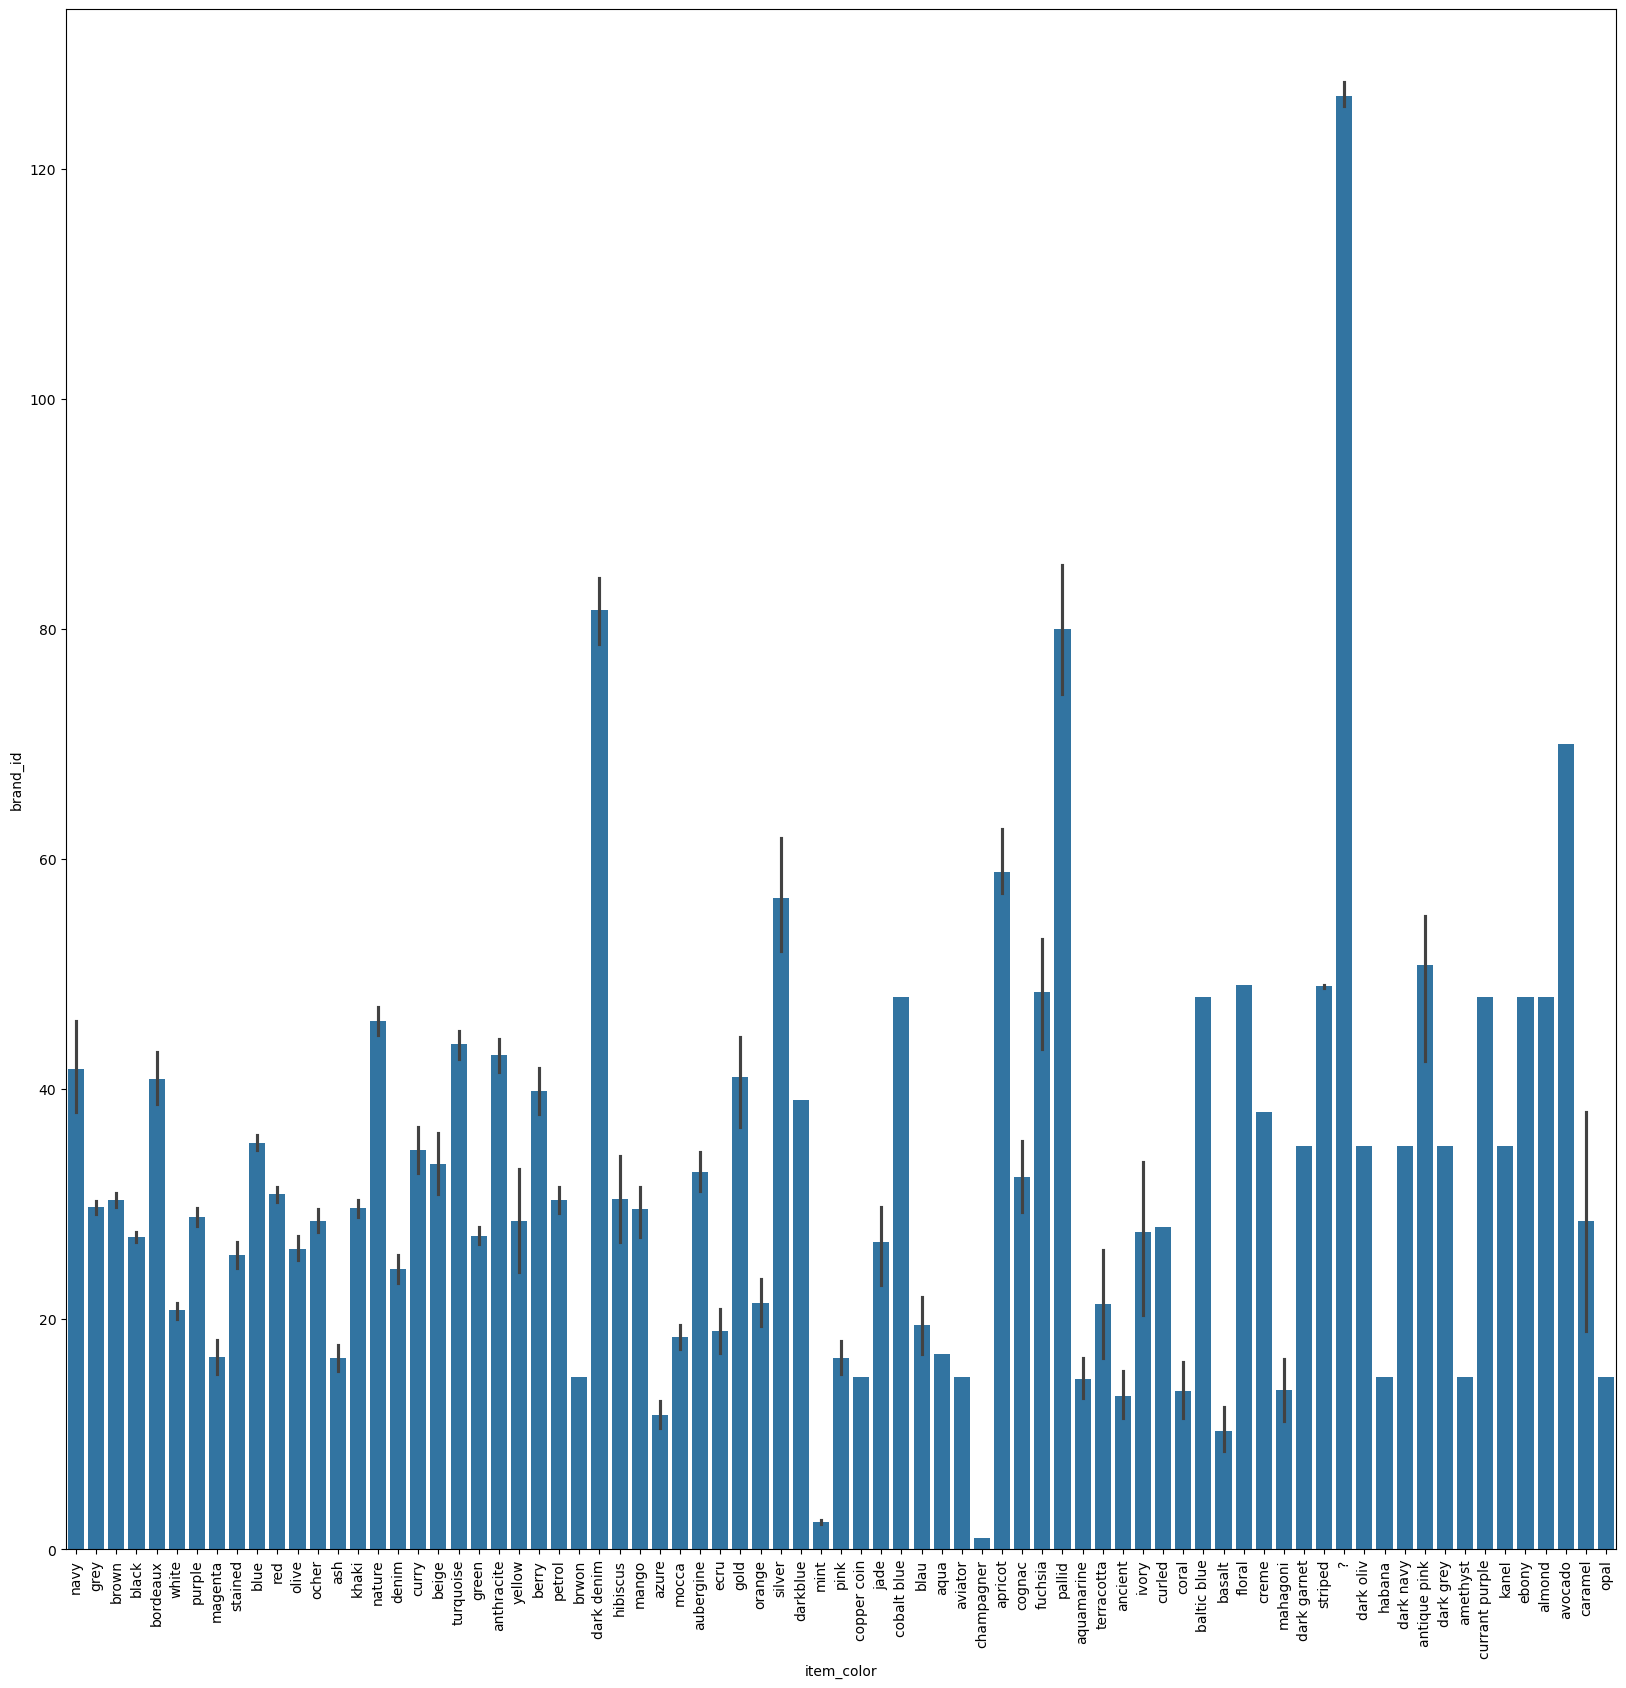

In [42]:
plt.figure(figsize=(20,20))
sns.barplot(x='item_color',y='brand_id',data=data)
plt.xticks(rotation=90)
plt.show()

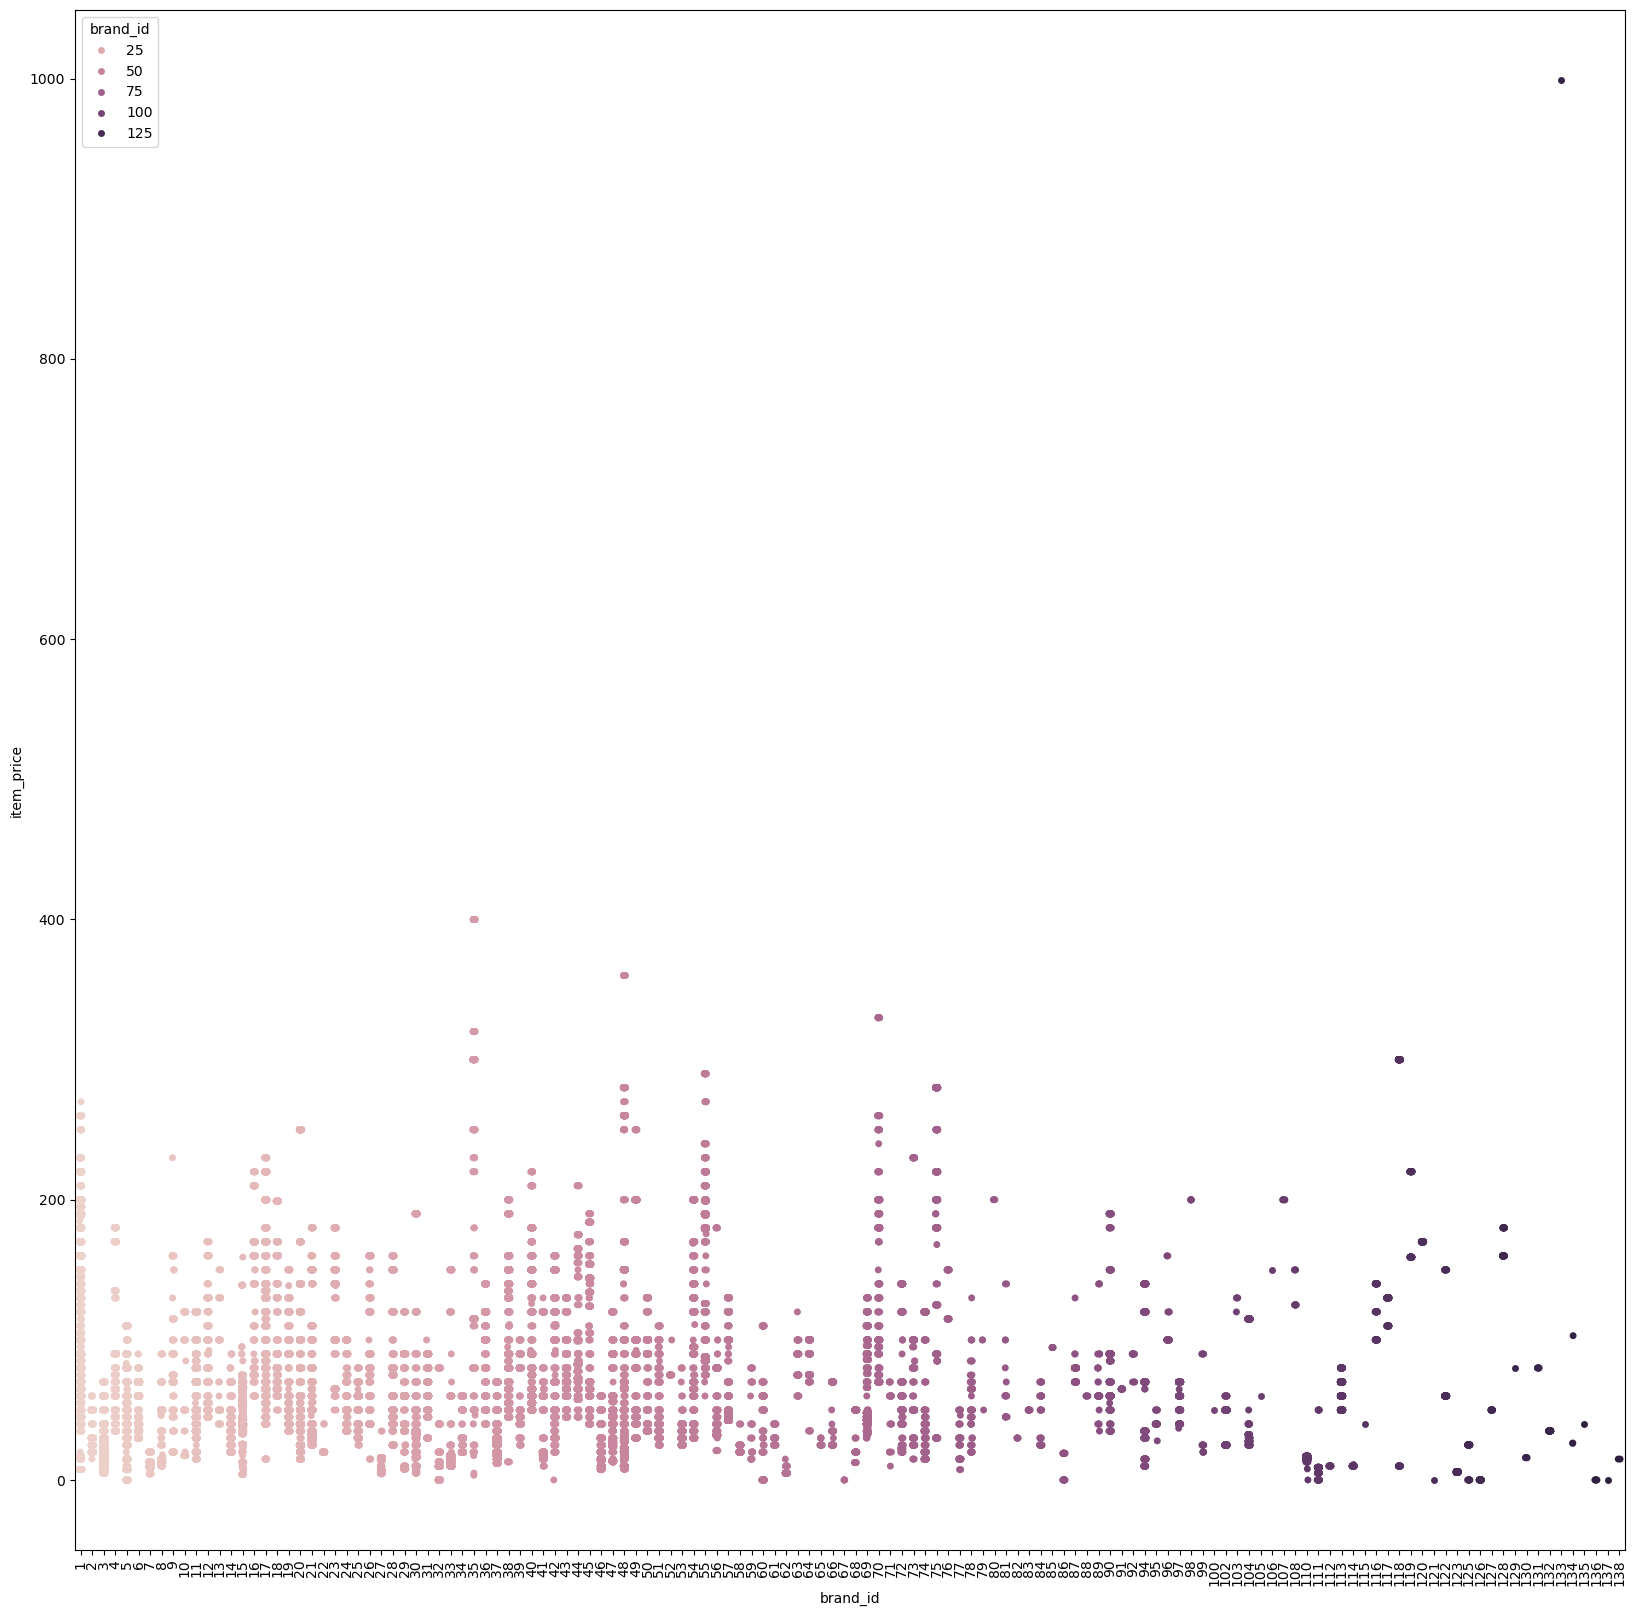

In [43]:
plt.figure(figsize=(20,20))
sns.stripplot(x='brand_id',y='item_price',data=data,hue='brand_id')
plt.xticks(rotation=90)
plt.show()

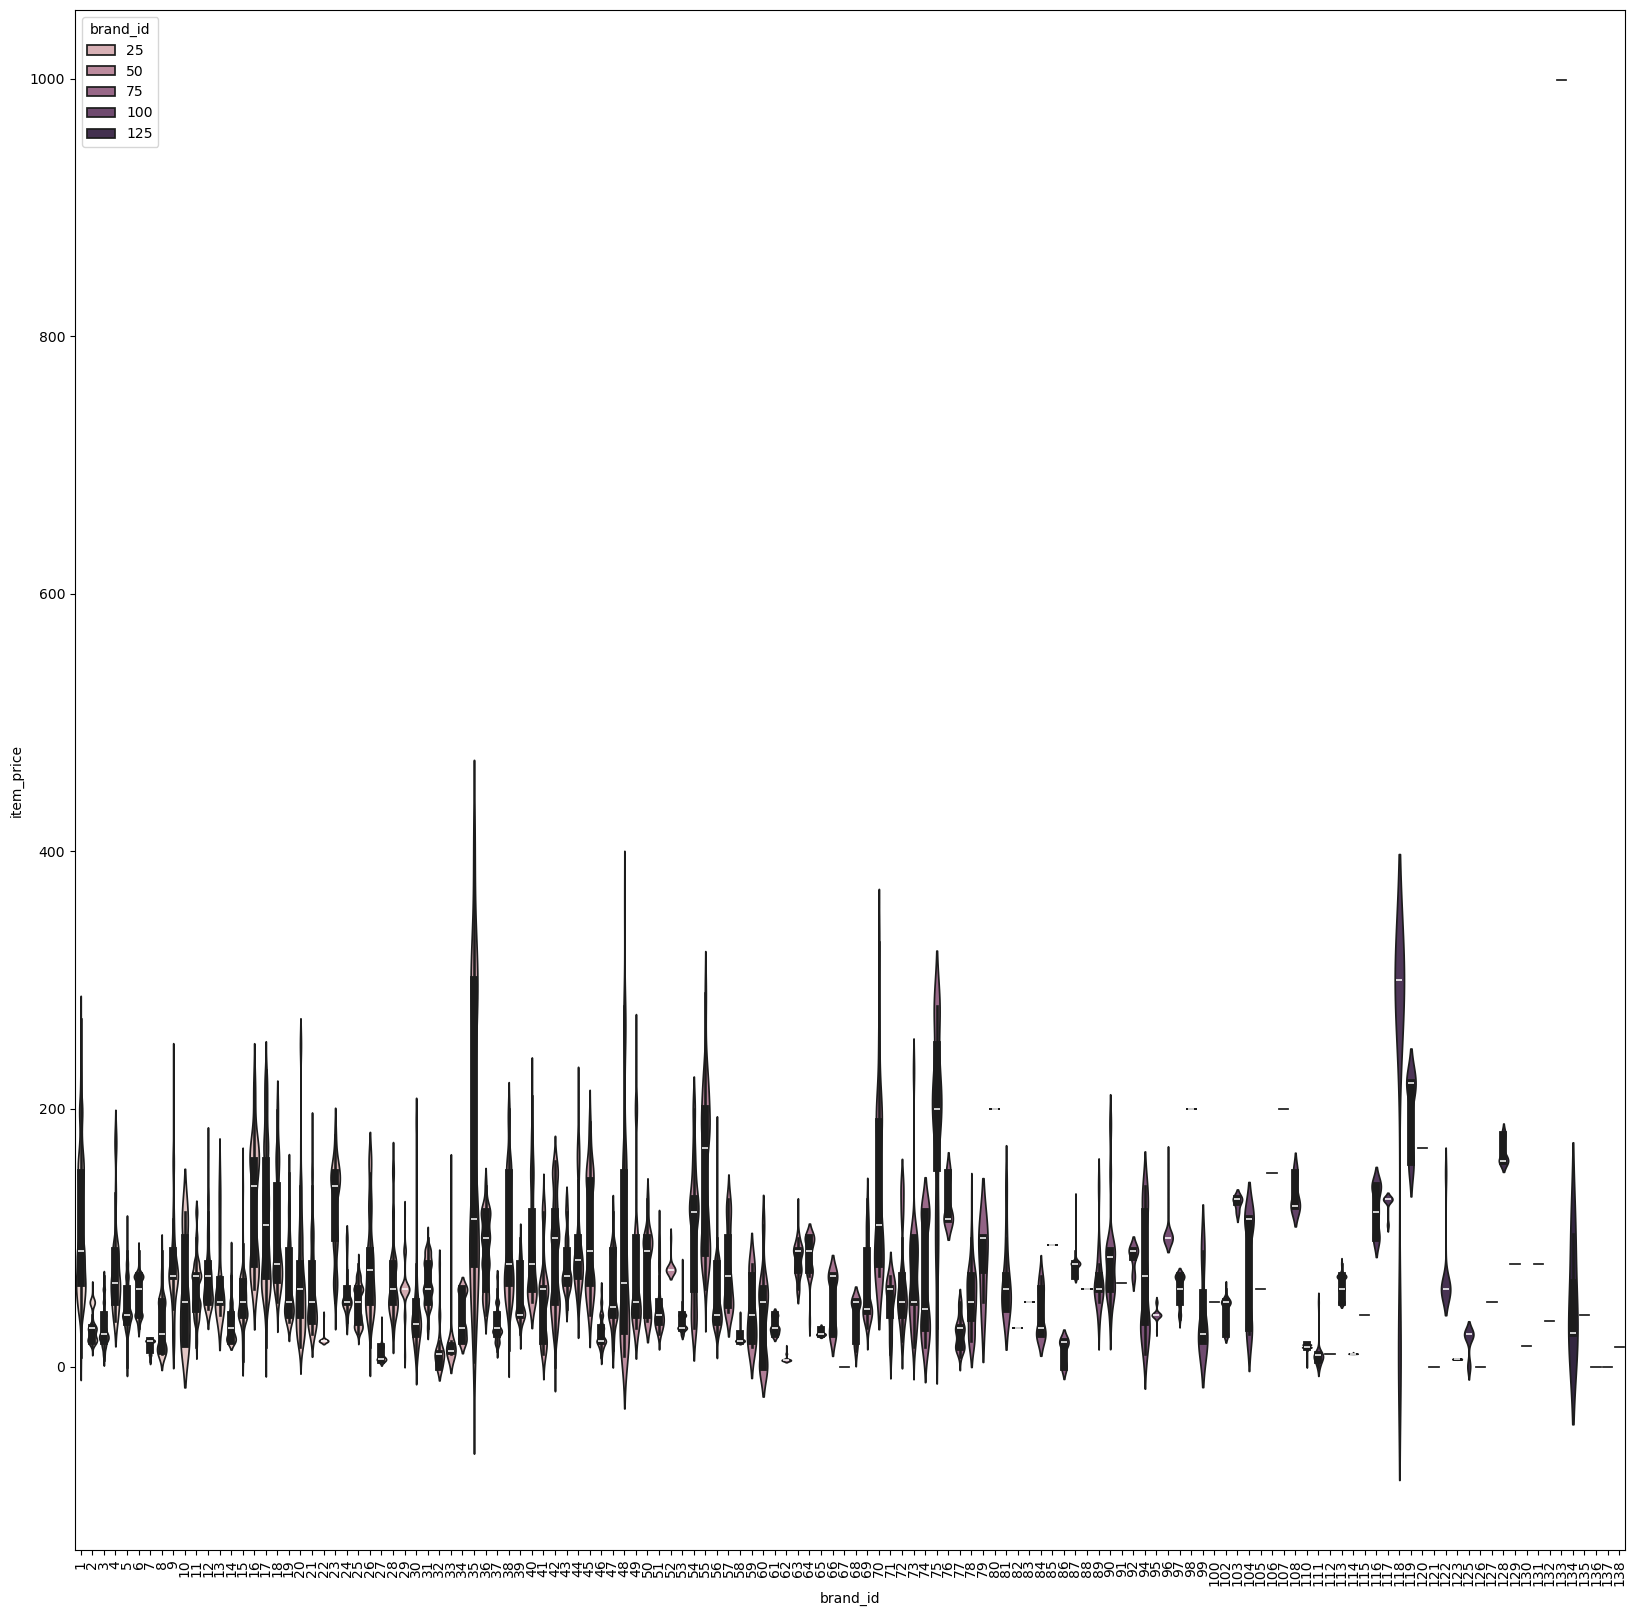

In [44]:
plt.figure(figsize=(20,20))
sns.violinplot(x='brand_id',y='item_price',data=data,hue='brand_id')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='item_id', ylabel='Count'>

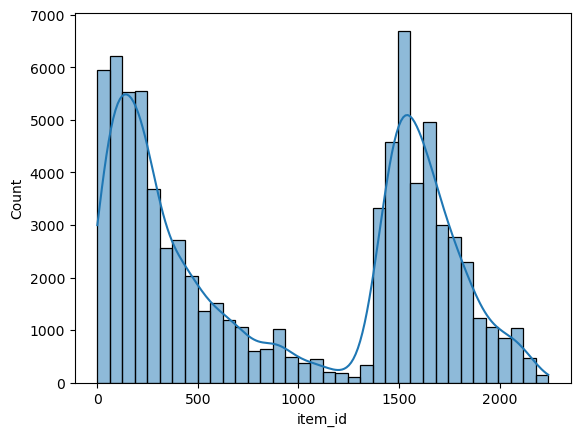

In [45]:
sns.histplot(data['item_id'],kde=True)

<Axes: xlabel='item_id', ylabel='return'>

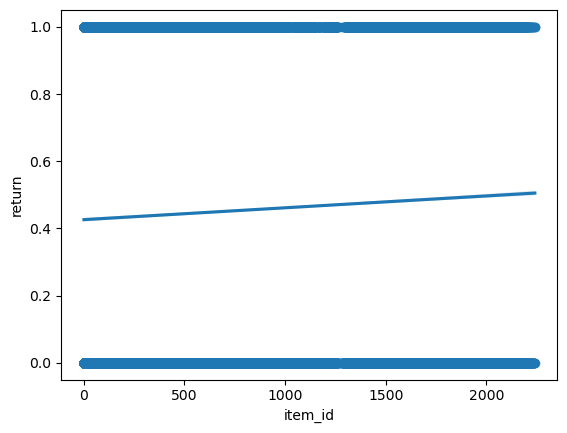

In [46]:
sns.regplot(x=data['item_id'],y=data['return'])

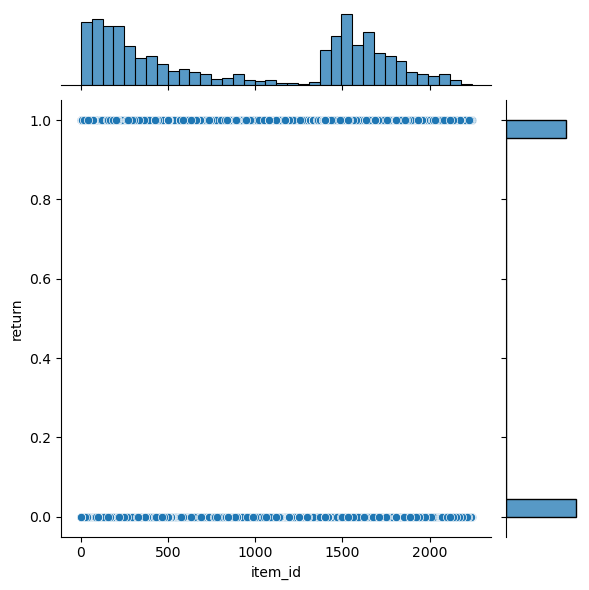

In [47]:
sns.jointplot(x=data['item_id'],y=data['return'])

In [48]:
num_data =data.select_dtypes(exclude='object')

In [49]:
num_data.corr()

,order_item_id,order_date,delivery_date,item_id,brand_id,item_price,user_id,user_state,return
order_item_id,1.000000,0.992006,0.158501,0.606556,0.140856,0.277034,0.221811,0.011500,0.059978
order_date,0.992006,1.000000,0.164747,0.626185,0.146097,0.287511,0.219717,0.011826,0.064689
delivery_date,0.158501,0.164747,1.000000,0.133456,0.039690,0.044542,0.022637,0.008339,0.295273
item_id,0.606556,0.626185,0.133456,1.000000,0.271013,0.411362,0.118042,0.009210,0.049778
brand_id,0.140856,0.146097,0.039690,0.271013,1.000000,0.082464,0.042111,-0.000891,0.028060
item_price,0.277034,0.287511,0.044542,0.411362,0.082464,1.000000,0.088005,-0.003843,0.143253
user_id,0.221811,0.219717,0.022637,0.118042,0.042111,0.088005,1.000000,0.007797,0.001727
user_state,0.011500,0.011826,0.008339,0.009210,-0.000891,-0.003843,0.007797,1.000000,0.000298
return,0.059978,0.064689,0.295273,0.049778,0.028060,0.143253,0.001727,0.000298,1.000000


<Axes: >

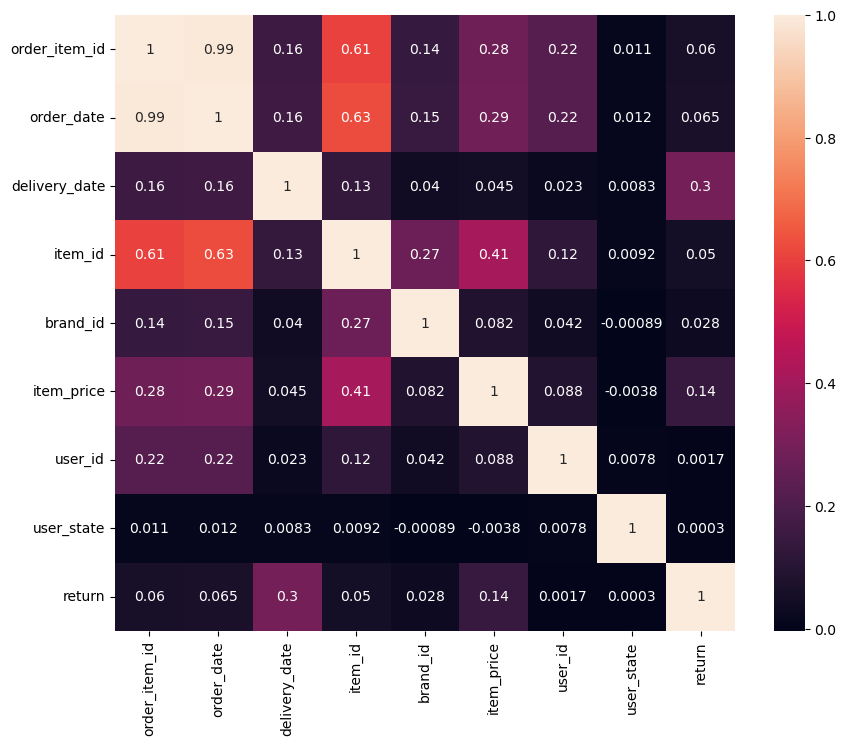

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(num_data.corr(),annot=True)

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
la = LabelEncoder()

In [53]:
columns_to_encode = [
    'order_date', 'delivery_date', 'item_id','item_size','item_color',
    'brand_id', 'item_price', 'user_id', 'return','user_reg_date','user_state','order_item_id'
]
la = LabelEncoder()
for col in columns_to_encode:
    data[col] = la.fit_transform(data[col])

In [54]:
data

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_state,user_reg_date,return
0,0,0,3,597,49,60,29,99,7314,12,423,0
1,9,0,3,188,100,47,45,42,7315,0,265,1
2,10,0,9,24,100,47,4,137,7315,0,265,0
3,28,1,2,168,95,22,19,42,4035,12,300,0
4,38,1,2,376,57,18,43,149,7318,5,152,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79940,79895,81,55,37,61,20,25,147,18283,6,223,1
79941,79902,81,0,1180,63,46,5,112,18284,6,223,0
79942,79926,81,55,1488,97,22,106,36,18290,9,300,0
79943,79932,81,55,1212,94,18,55,137,2918,7,356,0


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
y=data['return']
x=data.iloc[: ,:-1]
print(x)

       order_item_id  order_date  delivery_date  item_id  item_size  \
0                  0           0              3      597         49   
1                  9           0              3      188        100   
2                 10           0              9       24        100   
3                 28           1              2      168         95   
4                 38           1              2      376         57   
...              ...         ...            ...      ...        ...   
79940          79895          81             55       37         61   
79941          79902          81              0     1180         63   
79942          79926          81             55     1488         97   
79943          79932          81             55     1212         94   
79944          79941          81             55      151         22   

       item_color  brand_id  item_price  user_id  user_state  user_reg_date  
0              60        29          99     7314          12         

In [57]:
y

0        0
1        1
2        0
3        0
4        1
        ..
79940    1
79941    0
79942    0
79943    0
79944    0
Name: return, Length: 79945, dtype: int64

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=2)

In [59]:
x_train

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_state,user_reg_date
35319,42719,44,27,1528,49,47,73,167,344,9,420
26890,55163,53,39,1510,61,69,118,112,4586,9,172
45965,47566,47,29,1289,100,71,28,112,635,6,300
16744,54056,52,33,138,96,64,4,99,7179,1,300
24062,32861,31,17,177,94,13,4,82,11078,10,219
...,...,...,...,...,...,...,...,...,...,...,...
44295,34051,33,19,111,61,22,42,137,11969,13,481
33867,31270,28,16,582,98,4,35,112,1985,7,335
31019,8216,5,13,315,98,62,36,42,8509,0,293
44566,36250,37,22,1214,100,18,36,59,4370,9,116


In [60]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((63956, 11), (15989, 11), (63956,), (15989,))

In [61]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso

In [62]:
li=LinearRegression()
rid = Ridge()
la = Lasso()

In [63]:
li.fit(x_train,y_train)

LinearRegression()

In [64]:
li_predict=li.predict(x_test)

In [65]:
pd.DataFrame({'y_test':y_test,
             'li_pred':li_predict})

,y_test,li_pred
1311,0,0.302139
36722,1,0.354156
23008,0,0.357579
40004,1,0.576453
6339,0,0.412386
...,...,...
55557,0,0.513402
49020,0,0.550395
26955,1,0.521411
42543,0,0.471014


In [66]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [67]:
r2_score(y_test,li_predict)

0.05009314658117314

In [68]:
mean_absolute_error(y_test,li_predict)

0.47251723559325015

In [69]:
np.sqrt(mean_squared_error(y_test,li_predict))

0.4858123513838978

In [70]:
res = pd.DataFrame({'y_test':y_test,
                 'li_pred':li_predict})

In [71]:
res['MAE']= res.iloc[:,0]-res.iloc[:,1]
res

,y_test,li_pred,MAE
1311,0,0.302139,-0.302139
36722,1,0.354156,0.645844
23008,0,0.357579,-0.357579
40004,1,0.576453,0.423547
6339,0,0.412386,-0.412386
...,...,...,...
55557,0,0.513402,-0.513402
49020,0,0.550395,-0.550395
26955,1,0.521411,0.478589
42543,0,0.471014,-0.471014


In [72]:
logr= LogisticRegression()
logr.fit(x_train,y_train)

LogisticRegression()

In [73]:
logr_predict=logr.predict(x_test)

In [74]:
r2_score(y_test,logr_predict)

-0.7011429183355959

In [75]:
mean_absolute_error(y_test,logr_predict)

0.4226655825880293

In [76]:
np.sqrt(mean_squared_error(y_test,logr_predict))

0.6501273587444457

In [77]:
logr_predict=logr.predict(x_test)

In [78]:
la.fit(x_train,y_train)

Lasso()

In [79]:
la_predict=la.predict(x_test)

In [80]:
r2_score(y_test,la_predict)

0.02719355915450672

In [81]:
mean_absolute_error(y_test,la_predict)

0.48579309789223274

In [82]:
np.sqrt(mean_squared_error(y_test,la_predict))

0.49163326478278924

In [83]:
rid.fit(x_train,y_train)

Ridge()

In [84]:
rid_predict=rid.predict(x_test)

In [85]:
r2_score(y_test,rid_predict)

0.05009314750824734

In [86]:
mean_absolute_error(y_test,rid_predict)

0.47251723662407324

In [87]:
np.sqrt(mean_squared_error(y_test,rid_predict))

0.4858123511468303

In [88]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB

In [89]:
ber = BernoulliNB()
Gause =GaussianNB()
mul=MultinomialNB()

In [90]:
Gause.fit(x_train,y_train)

GaussianNB()

In [91]:
Gause_predict=Gause.predict(x_test)

In [92]:
r2_score(y_test,Gause_predict)

-0.7222876364682078

In [93]:
mean_absolute_error(y_test,Gause_predict)

0.42791919444618176

In [94]:
np.sqrt(mean_squared_error(y_test,Gause_predict))

0.6541553289901274

In [95]:
ber.fit(x_train,y_train)

BernoulliNB()

In [96]:
ber_predict=ber.predict(x_test)

In [97]:
r2_score(y_test,ber_predict)

-0.7852183451962189

In [98]:
mean_absolute_error(y_test,ber_predict)

0.4435549440240165

In [99]:
np.sqrt(mean_squared_error(y_test,ber_predict))

0.6659992072247658

In [100]:
mul.fit(x_train,y_train)

MultinomialNB()

In [101]:
mul_predict=mul.predict(x_test)

In [102]:
r2_score(y_test,mul_predict)

-0.9299589752706443

In [103]:
mean_absolute_error(y_test,mul_predict)

0.47951716805303646

In [104]:
np.sqrt(mean_squared_error(y_test,mul_predict))

0.6924717814128143

In [105]:
sns.__version__

'0.13.2'

In [106]:
pd.__version__

'2.2.2'